In [1]:
import numpy as np
import pandas as pd

In [3]:
DATA_LOC = './data/training.csv'
df = pd.read_csv(DATA_LOC)

In [5]:
df.geohash6.unique()

array(['qp03wc', 'qp03pn', 'qp09sw', ..., 'qp03yn', 'qp09v9', 'qp0d45'],
      dtype=object)

In [9]:
df.timestamp.unique()

array(['20:0', '14:30', '6:15', '5:0', '4:0', '12:15', '3:30', '20:45',
       '22:15', '9:15', '11:45', '14:45', '2:30', '23:45', '11:30',
       '10:0', '11:0', '18:30', '6:0', '13:0', '4:30', '15:30', '4:15',
       '9:0', '0:15', '21:15', '4:45', '12:30', '12:0', '14:15', '9:30',
       '5:15', '3:15', '16:30', '8:0', '11:15', '18:45', '16:0', '2:15',
       '7:0', '18:0', '3:0', '15:0', '22:45', '20:30', '0:30', '13:30',
       '22:0', '5:30', '9:45', '10:30', '17:0', '5:45', '6:30', '23:30',
       '1:15', '0:45', '1:30', '13:45', '12:45', '2:45', '19:15', '14:0',
       '13:15', '15:45', '8:45', '23:15', '16:15', '19:30', '21:30',
       '10:45', '7:15', '7:30', '16:45', '17:15', '23:0', '6:45', '18:15',
       '1:0', '8:15', '17:45', '22:30', '2:0', '1:45', '7:45', '10:15',
       '3:45', '8:30', '15:15', '21:0', '21:45', '19:45', '19:0', '0:0',
       '17:30', '20:15'], dtype=object)

In [12]:
def get_timestamp_order(ts):
    ts = ts.split(':')
    return int(ts[0])*4 + int(ts[1])//15

In [24]:
df.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [33]:
def format_order(row):
    return row['day']*96 + get_timestamp_order(row['timestamp'])

In [36]:
df['order'] = df.apply(format_order, axis=1)

In [37]:
df.head()

,geohash6,day,timestamp,demand,order
0,qp03wc,18,20:0,0.020072,1808
1,qp03pn,10,14:30,0.024721,1018
2,qp09sw,9,6:15,0.102821,889
3,qp0991,32,5:0,0.088755,3092
4,qp090q,15,4:0,0.074468,1456


In [39]:
t_df = df[df.geohash6 == 'qp03wc']

In [43]:
len(t_df.order.unique()), t_df.shape

(5815, (5815, 5))

In [46]:
np.max(df.order.unique()), np.min(df.order.unique()) # day starts at 1 instead of 0, so we get a weird 96

(5951, 96)

In [47]:
df.order = df.order - 96

In [51]:
len(df.order.unique()), np.max(df.order.unique()), np.min(df.order.unique())

(5847, 5855, 0)

In [49]:
np.max(df.day)

61

In [52]:
61 * 96

5856

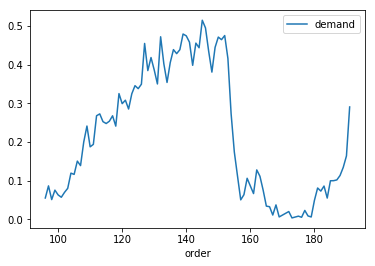

In [59]:
t_df[t_df.day == 1].sort_values(by=['order']).plot(x='order', y='demand')

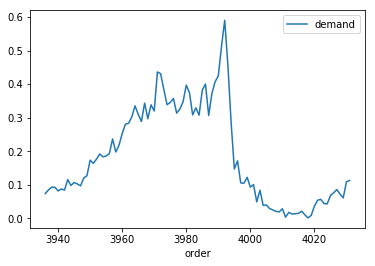

In [66]:
t_df[t_df.day == 41].sort_values(by=['order']).plot(x='order', y='demand')

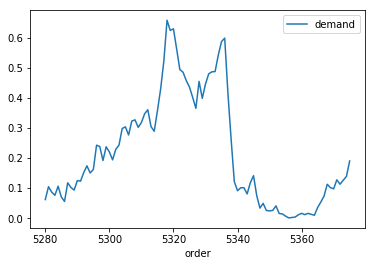

In [67]:
t_df[t_df.day == 55].sort_values(by=['order']).plot(x='order', y='demand')

In [8]:
for loc in df.geohash6.unique():
    loc_df = df[df.geohash6 == loc]
    if len(loc_df.day.unique()) != 61:
        print(loc)

qp09bq
qp0dhu
qp09ev
qp0d56
qp0djv
qp09cp
qp09vw
qp03z3
qp09ef
qp09vz
qp0d4f
qp09md
qp0d0g
qp09eu
qp09dw
qp09dv
qp09t1
qp09wp
qp09jn
qp0934
qp03pu
qp091n
qp0d0b
qp0d5e
qp0d4d
qp06nu
qp0dhy
qp0djn
qp0d42
qp093m
qp09jf
qp08b5
qp0djc
qp08gj
qp097m
qp08g4
qp09ch
qp091k
qp09mz
qp09kd
qp09jz
qp0d5c
qp099n
qp03vf
qp09du
qp09ec
qp08fn
qp09ve
qp09jm
qp094e
qp08c5
qp09vs
qp09s1
qp08bg
qp0dn5
qp09v8
qp0dhf
qp08fj
qp09jk
qp03qp
qp09je
qp03vd
qp08cv
qp09tb
qp02zf
qp09mj
qp0dh1
qp0dhd
qp090v
qp0937
qp08g7
qp08fh
qp0d55
qp09cz
qp08cu
qp09hz
qp08be
qp095g
qp09cb
qp0938
qp0djb
qp09jx
qp090y
qp09c2
qp0dhm
qp08bu
qp02yf
qp0dn1
qp09qj
qp09km
qp09ty
qp09v3
qp09he
qp0965
qp0967
qp09m8
qp02z4
qp097p
qp091e
qp09m3
qp08b1
qp092z
qp097q
qp0d5h
qp08fp
qp0955
qp03zy
qp09y4
qp09y0
qp09np
qp02z3
qp08fz
qp03pg
qp09mf
qp093n
qp03nn
qp09kq
qp09q0
qp0d5j
qp0943
qp0djg
qp08bt
qp09qn
qp03p5
qp09vh
qp095h
qp08cj
qp09mb
qp0d57
qp09j9
qp09k5
qp0d1v
qp08bs
qp09bx
qp03qt
qp09j5
qp09te
qp0dju
qp0d5t
qp09s4
qp0942
qp09cs
qp09jr